In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
#reading the excel file (dataset)
df=pd.read_excel('data set.xlsx')

In [3]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [4]:
#getting the insight of the given dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [5]:
#So there is no Null values in the dataset
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f45f2c964f0>,
      dtype=object)

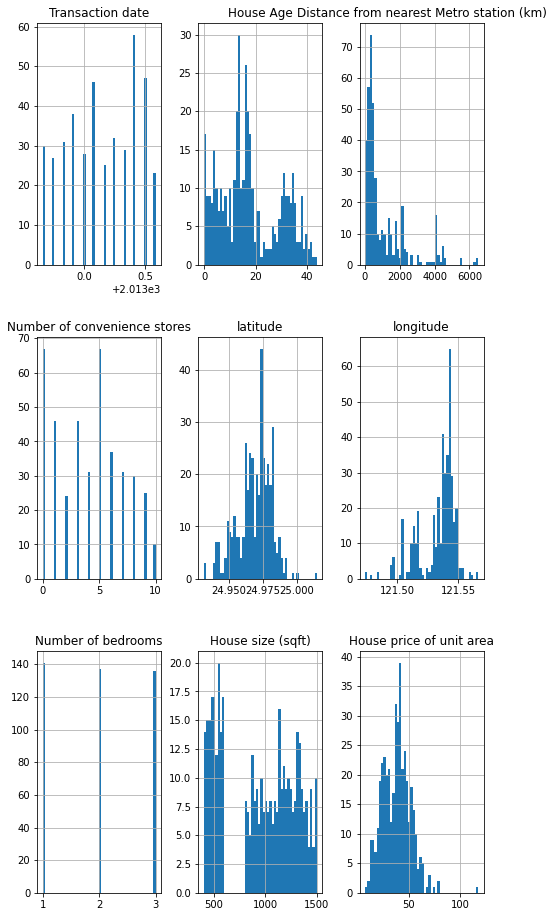

In [6]:
df.hist(figsize=(8,16),bins=50)

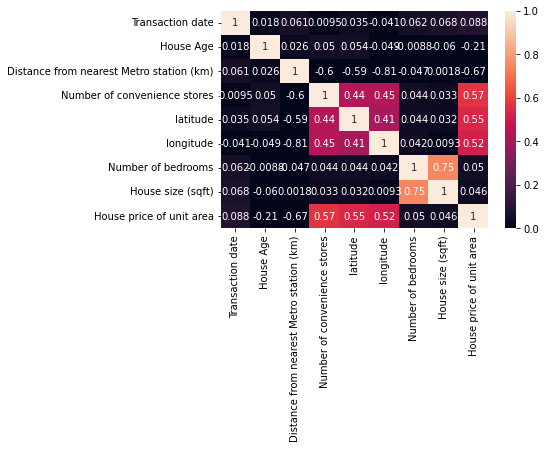

In [7]:
#setting up a correlation plot to view the relation of each features on other feature 
import seaborn as sns
sns.heatmap(df.corr(),vmax=1,vmin=0,annot=True)

In [8]:
#seperating the dataset in feature vector and target vector
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [9]:
#dividing the whole dataset into two parts i.e, a training set and testing set 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10)

In [10]:
#applying Random forest model on the dataset
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [11]:
#Checking the R2 score on the previous model
from sklearn.metrics import r2_score
r2_score(rf.predict(x_test),y_test)

0.5397847811738693

In [12]:
#Using Standard Scaler to bring the dataset in a certain scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=pd.DataFrame(sc.fit_transform(x_train),columns=x_train.columns)
x_test=pd.DataFrame(sc.transform(x_test),columns=x_test.columns)

In [13]:
#importing the important library for applying Neural Network structure
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam

In [14]:
#Setting up the proper model with Layers and dropout layers
model = Sequential([
    Dense(160, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(480, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(256, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='silu')
  ])

In [15]:
#using mean squred error to evaluate the epochs
from tensorflow.keras.losses import MeanSquaredError
model.compile(
    loss=MeanSquaredError(), 
    optimizer=Adam(learning_rate=0.001), 
    metrics=[MeanSquaredError()]
)

In [16]:
#fitting the train set in the neural network model
pr=model.fit(
    x_train.values, 
    y_train.values, 
    epochs=100, 
    batch_size=10,
    validation_split=0.1
)

Epoch 1/100
28/28 [==============================] - 1s 11ms/step - loss: 1211.0983 - mean_squared_error: 1208.3282 - val_loss: 197.0495 - val_mean_squared_error: 159.3677
Epoch 2/100
28/28 [==============================] - 0s 5ms/step - loss: 162.4011 - mean_squared_error: 161.9308 - val_loss: 60.6432 - val_mean_squared_error: 47.2353
Epoch 3/100
28/28 [==============================] - 0s 6ms/step - loss: 94.1335 - mean_squared_error: 93.9656 - val_loss: 51.0409 - val_mean_squared_error: 39.6418
Epoch 4/100
28/28 [==============================] - 0s 5ms/step - loss: 85.2181 - mean_squared_error: 85.1063 - val_loss: 58.7507 - val_mean_squared_error: 46.2314
Epoch 5/100
28/28 [==============================] - 0s 7ms/step - loss: 75.2412 - mean_squared_error: 75.1276 - val_loss: 47.9574 - val_mean_squared_error: 37.7425
Epoch 6/100
28/28 [==============================] - 0s 5ms/step - loss: 74.7685 - mean_squared_error: 74.7246 - val_loss: 54.6786 - val_mean_squared_error: 43.2306
E

In [42]:
#predicting the price per units of area from the features given in testing set
y_pred=model.predict(x_test)
for i in range (0,len(y_pred)):
  y_pred[i]=math.floor(y_pred[i])

4/4 [==============================] - 0s 3ms/step


In [43]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()

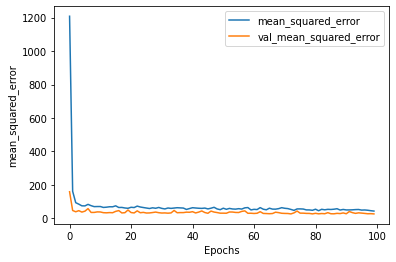

In [44]:
#plotting the the graph between epochs and mean squared error
plot_history(pr, 'mean_squared_error')

In [45]:
r2_score(y_test,y_pred)

0.6658989862476378